# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
# dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())
%load_ext autoreload
%autoreload 2
%tb

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


No traceback available to show.


In [8]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(None)

In [10]:
from extractors.LocationData import LocationData
sceneData = LocationData.load("../data/location-2/home", "2022-12-09-fps-5-scene-10.dill")
pedDf = sceneData.getPedDataInSceneCoordinates()
otherDf = sceneData.getOtherDataInSceneCoordinates()
sceneMeta = sceneData.getMeta()

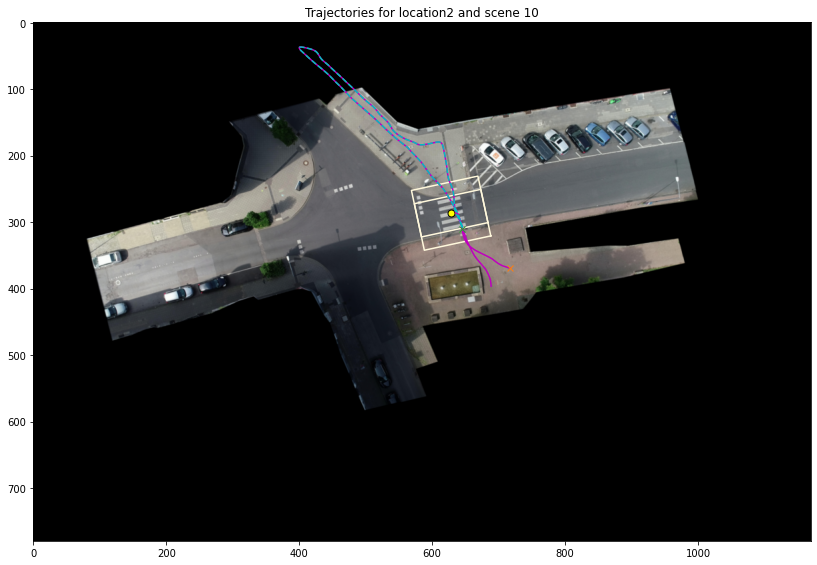

In [9]:
visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[26167])

In [11]:
ped26167 = pedDf[pedDf["uniqueTrackId"]==26167]

In [14]:
ped26167.to_csv("../data/location-2/problemTracks/ped26167.csv")

In [15]:
# visualize all peds
from math import ceil
allPedIds = sceneData.uniquePedIds()
# limit = 50
# nPedIds = len(allPedIds)
# nPages = ceil(nPedIds / limit)
# for page in range(nPages):
#     offset = page * limit
#     visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=False, offset=offset, limit=limit)

In [16]:
problemId = allPedIds[411]
problemTrack = pedDf[pedDf["uniqueTrackId"] == problemId]
problemId

26167

In [17]:
print(TrajectoryUtils.length(problemTrack, xCol="sceneX", yCol="sceneY"))

75.64104831812149
